<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/datasets/kv-anlagen/da_kvanlagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beschreibung Datensatz

Die Kehrichtverbrennung ist die Verbrennung der atmosphärisch brennbaren Anteile von Abfall zum Zwecke der Volumenreduzierung des Abfalls unter Nutzung der enthaltenen Energie.Der schweizerische KVA-Park umfasst im Jahr 2017 30 Anlagen mit Kapazitäten zwischen 30‘000 und 230‘000 Jahrestonnen. Die Gesamtmenge an brennbaren Abfällen aus der Schweiz und dem Ausland, die in KVA thermisch verwertet werden, beläuft sich auf ca. 4 Mio. Tonnen. Die bei der Verbrennung anfallende Wärme wird für die Produktion von Strom oder für den Betrieb von Fernwärmenetzen bzw. für Prozesswärme für Industrieanlagen eingesetzt. Im Jahr 2017 produzierten die 30 KVA eine bisherige Rekordmenge an Energie von gesamthaft 4'036 Gigawattstunden (GWh) Wärme und 2338 GWh Strom. Sie tragen damit rund 2.5 Prozent zur Deckung des schweizerischen Gesamtenergiebedarfs bzw. knapp 4 Prozent zur schweizerischen Stromproduktion bei. Die Geofachdaten KVA dokumentieren den aktuellen Stand verwerteter Abfallmengen und der nach aussen gelieferten Energiemengen. Sämtliche Informationen basieren auf den Auskünften der Anlagenbetreibenden. Die Angaben dienen als Informationsmaterial für die Öffentlichkeit und stellen keine amtliche Auskunft oder rechtsverbindliche Aussage dar.

Quelle: [opendata.swiss](https://opendata.swiss/de/dataset/kehrichtverbrennungsanlagen-kva)

Weiterführende Informationen ([PDF](https://github.com/sakuronohana/my_datascience/blob/master/datasets/kv-anlagen/9701-Modelldokumentation_MGDM_Kehrichtverbrennungsanlagen_DE_V1_0_PDF.pdf))

In [ ]:
!pip install geopandas

In [7]:
# Load python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import geopandas as gpd


In [2]:
# Load datas

datloc_el = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/Electricity.csv'
datloc_ht = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/Heat.csv'
datloc_rw = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/RecycledWaste.csv'
datloc_wip = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/kv-anlagen/WasteIncinerationPlant.csv'

kv_electricity = pd.read_csv(datloc_el) # Durch KV produzierter Strom
kv_heat = pd.read_csv(datloc_ht) # Durch KV produzierte Wärme
kv_recywaste = pd.read_csv(datloc_rw) # Durch KV verbrante Abfallmenge
kv_wasteincplant = pd.read_csv(datloc_wip, encoding='latin1') # Informationen zu Kehrichtverbrennugsanlagen

In [3]:
# Sample of determining the Values of a Dataset
kv_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    30 non-null     object 
 1   id      30 non-null     object 
 2   2010    30 non-null     int64  
 3   2011    30 non-null     int64  
 4   2012    30 non-null     int64  
 5   2013    30 non-null     int64  
 6   2014    30 non-null     int64  
 7   2015    30 non-null     int64  
 8   2016    30 non-null     int64  
 9   2017    30 non-null     int64  
 10  2018    30 non-null     float64
 11  2019    30 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 2.9+ KB


In [4]:
# Datentype von float auf int64 ändern
kv_electricity['2018'] =  kv_electricity['2018'].astype('int64')
kv_electricity['2019'] =  kv_electricity['2019'].astype('int64')
kv_heat['2018'] =  kv_heat['2018'].astype('int64')
kv_heat['2019'] =  kv_heat['2019'].astype('int64')
kv_recywaste['2017'] =  kv_recywaste['2017'].astype('int64')
kv_recywaste['2018'] =  kv_recywaste['2018'].astype('int64')
kv_recywaste['2019'] =  kv_recywaste['2019'].astype('int64')

In [5]:
# Show Basic Statistics Electricity Production
kv_electricity.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,45551.633333,46567.566667,49057.233333,51795.200000,55275.233333,57182.333333,61506.333333,61748.033333,61019.500000,61845.100000
std,28655.553064,28997.873496,31563.700279,34142.826413,34779.440771,33928.672938,38197.343047,37912.767479,37523.973317,37577.819241
min,0.000000,0.000000,0.000000,0.000000,0.000000,671.000000,426.000000,847.000000,651.000000,907.000000
25%,25291.750000,26366.000000,21500.500000,23473.750000,25063.250000,27102.250000,33017.500000,33330.000000,32632.000000,33153.250000
50%,42718.500000,43676.000000,45938.500000,46230.000000,52597.500000,58790.500000,59277.000000,59573.500000,57716.500000,59091.500000
75%,67155.000000,64120.500000,66720.500000,76324.500000,82235.750000,81949.500000,82195.500000,86105.500000,81882.750000,75007.500000
max,97638.000000,101842.000000,112786.000000,132666.000000,136451.000000,134900.000000,149511.000000,151555.000000,164449.000000,155779.000000


In [ ]:
# Find the max. Value 
print(kv_electricity[kv_electricity['2018'] == kv_electricity['2018'].max()])

# Find the min. Value
print(kv_electricity[kv_electricity['2018'] == kv_electricity['2018'].min()])


      Name    id  2010  2011  2012  ...    2015    2016    2017    2018    2019
11  Perlen  LU_2     0     0     0  ...  100658  149511  151555  164449  155779

[1 rows x 12 columns]
      Name    id  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019
21  Gamsen  VS_1   509   510   534   511   426   671   426   847   651   907


In [49]:
# Transpose of a Matrix 
kv_elect_transp = pd.DataFrame(kv_electricity.select_dtypes(include=['int64']).transpose())
kv_elect_transp.columns = kv_electricity['Name']
kv_elect_transp = kv_elect_transp.reset_index()
kv_elect_transp = kv_elect_transp.reset_index(drop=True)
kv_elect_transp.rename(columns={'index':'Jahr'}, inplace=True)
kv_elect_transp

Name,Jahr,Buchs (AG),Oftringen,Turgi,Bern,Biel,Thun,Basel,Posieux,Genf,Niederurnen,Trimmis,Perlen,Colombier,La Chaux-de-Fonds,Bazenheid,Buchs (SG),St. Gallen,Zuchwil,Weinfelden,Giubiasco,Lausanne,Gamsen,Sion,Monthey,Dietikon,Hinwil,Horgen,ZH Hagenholz,ZH Josefstrasse,Winterthur
0,2010,45221,46166,68338,18795,15000,70199,28820,52000,93658,63606,39851,0,27079,18358,9000,87704,24696,40216,31350,97638,55773,509,27212,80182,47919,89089,18131,88691,49763,31585
1,2011,47105,46181,69023,23339,17761,69391,41171,55166,98601,58860,50254,0,27861,18309,9643,88895,26438,39341,39133,101842,65874,510,26342,50576,50675,98781,19382,92843,32098,31632
2,2012,45046,46821,68877,20000,16969,67576,45056,45056,102283,62616,47901,0,26002,16903,10853,84143,18574,50144,39527,106718,63624,534,26529,112786,49832,99645,19033,82187,32328,64154
3,2013,42011,45906,67293,46554,14750,72534,44408,53915,84382,60223,42593,0,22558,16900,8075,77588,23113,132666,38127,102212,46922,511,24556,97010,50627,102441,18862,96570,31413,89136
4,2014,64247,46689,66822,45198,14326,73262,55193,53956,88665,63826,49191,0,24766,18942,21381,85227,20869,136451,40176,98235,52101,426,25955,111816,53094,102341,20463,101598,33837,89204
5,2015,64431,21865,63914,60519,15629,71084,59158,55504,82198,62224,45817,100658,25500,15111,36289,81204,18232,134900,39873,103862,58423,671,23055,86413,51773,91368,8839,95197,31909,109850
6,2016,68333,46242,63679,73081,14583,73291,47708,45785,80646,64327,44649,149511,18325,15636,40039,82712,18981,124869,43513,105845,63037,426,23864,113888,55517,110190,12603,104570,30677,108663
7,2017,64348,45827,64470,72863,15438,64382,54964,54781,88151,64183,46295,151555,11899,15549,41019,79969,18095,123748,41327,103597,70548,847,23314,107423,53305,112274,18954,104002,30767,108547
8,2018,73645,45411,63612,76311,14929,75286,58461,56972,71719,36889,48690,164449,26464,14982,39064,83740,12332,129084,43982,99467,70086,651,27329,90212,54388,102185,18818,104083,31213,96131
9,2019,73914,47961,63237,75372,14236,73000,55542,42175,70656,62641,44521,155779,29442,13190,37651,73700,20106,129095,48452,100121,69849,907,26227,109733,47447,108743,18776,103211,31654,108015


In [55]:
kv_elect_transp[kv_elect_transp['Jahr'] == '2010']

Name,Jahr,Buchs (AG),Oftringen,Turgi,Bern,Biel,Thun,Basel,Posieux,Genf,Niederurnen,Trimmis,Perlen,Colombier,La Chaux-de-Fonds,Bazenheid,Buchs (SG),St. Gallen,Zuchwil,Weinfelden,Giubiasco,Lausanne,Gamsen,Sion,Monthey,Dietikon,Hinwil,Horgen,ZH Hagenholz,ZH Josefstrasse,Winterthur
0,2010,45221,46166,68338,18795,15000,70199,28820,52000,93658,63606,39851,0,27079,18358,9000,87704,24696,40216,31350,97638,55773,509,27212,80182,47919,89089,18131,88691,49763,31585


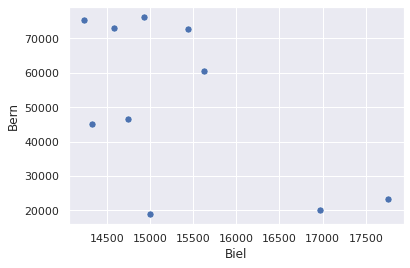

In [56]:
# Scatterplot mit Seaborn
sns.set()
sns.scatterplot(
    data = kv_elect_transp,
    x = 'Biel', 
    y = 'Bern', 
    s=50,
    )

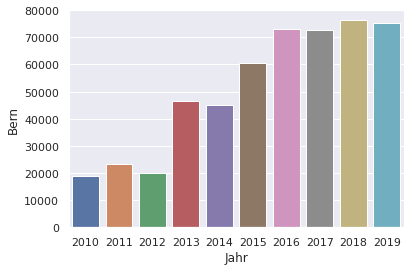

In [60]:
# Balkendiagramm mit Seaborn

ax = sns.barplot(x = kv_elect_transp['Jahr'], y= kv_elect_transp['Bern'])